# **Resume Screening with Natural Language Processing**

##  Data Used
We have publically available data from Kaggle. You can download the data using the below link.

 https://www.kaggle.com/gauravduttakiit/resume-dataset


**Category:** Type of Job Resume fits for.

**Resume:** Resume of candidates

In [1]:
!pip install cdqa

     |████████████████████████████████| 51kB 4.2MB/s 
     |████████████████████████████████| 102kB 7.1MB/s 
     |████████████████████████████████| 286kB 36.9MB/s 
     |████████████████████████████████| 10.4MB 36.7MB/s 
     |████████████████████████████████| 317kB 40.5MB/s 
     |████████████████████████████████| 6.7MB 27.8MB/s 
     |████████████████████████████████| 748.9MB 15kB/s 
     |████████████████████████████████| 92kB 11.8MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 133kB 53.3MB/s 
     |████████████████████████████████| 1.2MB 38.6MB/s 
     |████████████████████████████████| 901kB 42.8MB/s 
     |████████████████████████████████| 81kB 11.3MB/s 
     |████████████████████████████████| 7.7MB 24.8MB/s 
  Created wheel for cdqa: filename=cdqa-1.3.9-cp37-none-any.whl size=47651 sha256=17315b0b6cde9d8f5a4c8b60ae4fb9a6b4d2815db4957727228c684f7b5e0721
  Stored in directory: /root/.cache/pip/wheels/8b/9a/68/d3f7651ea29c30d1beb

In [1]:
import os
import pandas as pd
from ast import literal_eval
from cdqa.utils.converters import pdf_converter
from cdqa.pipeline import QAPipeline
from cdqa.utils.download import download_model

/usr/local/lib/python3.7/dist-packages/tqdm/autonotebook/__init__.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [59]:

path = "/content/drive/MyDrive/Colab/NLP/PDF/"

df = pdf_converter(directory_path = path)
# df = pdf_converter(directory_path = './docs/')
df

,title,paragraphs
0,Rahul_Pushpala,"[Rahul PushpalaData Analyst | Data Scientist, ..."
1,Nikhil_Pawar_Resume,"[NikhilPawarData Science Practitioner, Nikhil ..."
2,DotnetResume,"[Luella Green , 88605 Maximilian Mall San Fr..."
3,nse,"[USER , YOUR NAME E-Mail: youremail@domain.c..."
4,hr,"[Email: youremail@gmail.com , Phone: 895 555 5..."


In [3]:
df['title']

0    Rahul_Pushpala
Name: title, dtype: object

In [7]:
tx = df['paragraphs'][0]
tx = '\n'.join(tx)
tx

'Rahul PushpalaData Analyst | Data Scientist\n8108120889 /rahulpushpala rahulpushpala35@gmail.com /T3ch-miNer rahul_dbz\n500007\xa0Hyderabad,\xa0India\nTECHNICAL SKILLS\nProgramming Languages :Python 3, SQL, PowerQuery\nTechnologies :Data Analysis/ Data Visualization, Machine Learning, Natural Language Processing (NLP)\nTools / Softwares :Excel, Alteryx, Power Bi, PostgreSQL.\nUpskilling :AWS, Pytorch and Advance NPL\nGame Development :Unity , Blender\nACADEMIC PROFICIENCYData Science Masters Program - Data Science, Machine LearningGreyAtomSep\xa02019 – May\xa02020 | Mumbai\nAs a Data Science Immersive student at GreyAtom,Classwork ranged from in-class projects and various competitions to personal projects focused on real-world applications of data science principles and best practices.Python libraries sklearn, pandas, seaborn matplotlib,nltk\nBachelor of Engineering - BE, Computer EngineeringPillai College Of Engineering (Mumbai University)2019 | Mumbai\nORGANISATIONSPetFedVolunteer20

In [8]:
import pandas as pd
import re



In [9]:
df = pd.read_csv('/content/drive/MyDrive/Colab/NLP/Data/UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
df.shape

(962, 2)

In [ ]:
df['Category'].nunique()

25

In [ ]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
ETL Developer                40
Operations Manager           40
Data Science                 40
Blockchain                   40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

There are 25 different categories we have in the data.  The top 3 job categories we have in the data are as follows.

Java developer, Testing, and DevOps Engineer.

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

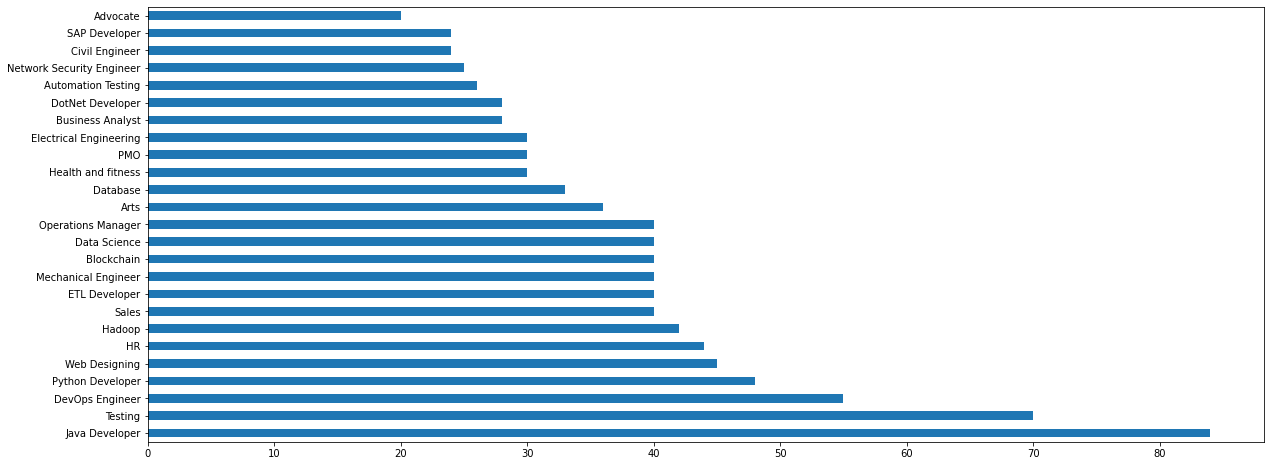

In [11]:
#Visualization of various categories
plt.figure(figsize=(20,8))
df['Category'].value_counts(sort=True).nlargest(25).plot.barh()

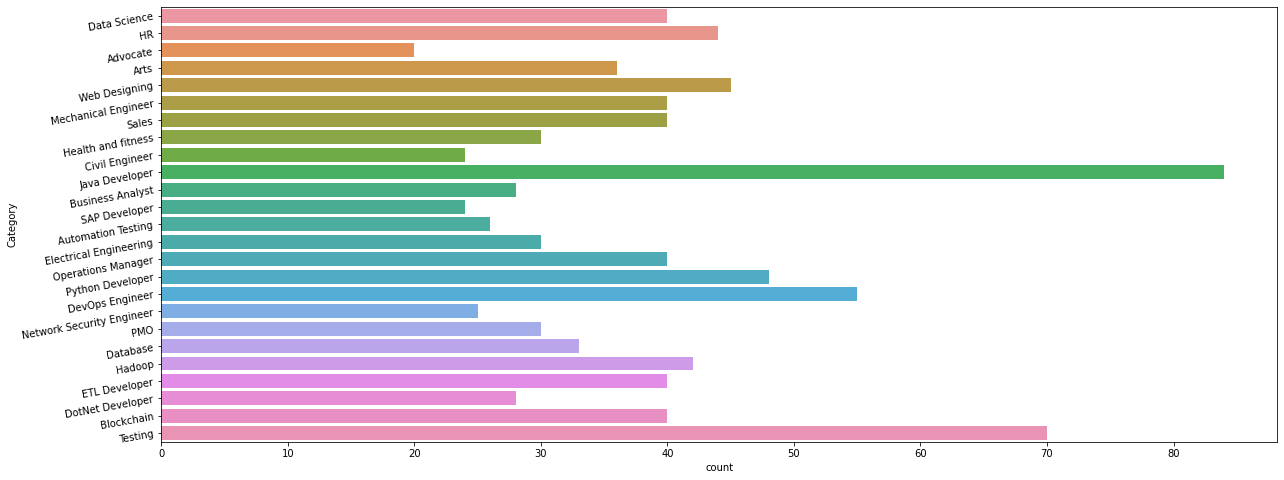

In [12]:
plt.figure(figsize=(20,8))
plt.yticks(rotation=10)
ax = sns.countplot(y="Category", data = df, )

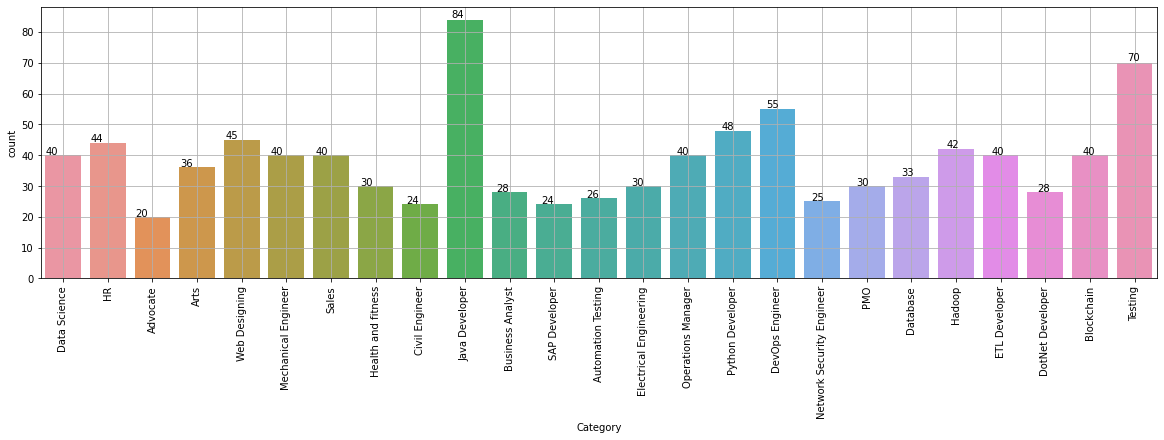

In [13]:

plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax = sns.countplot(x="Category", data = df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()

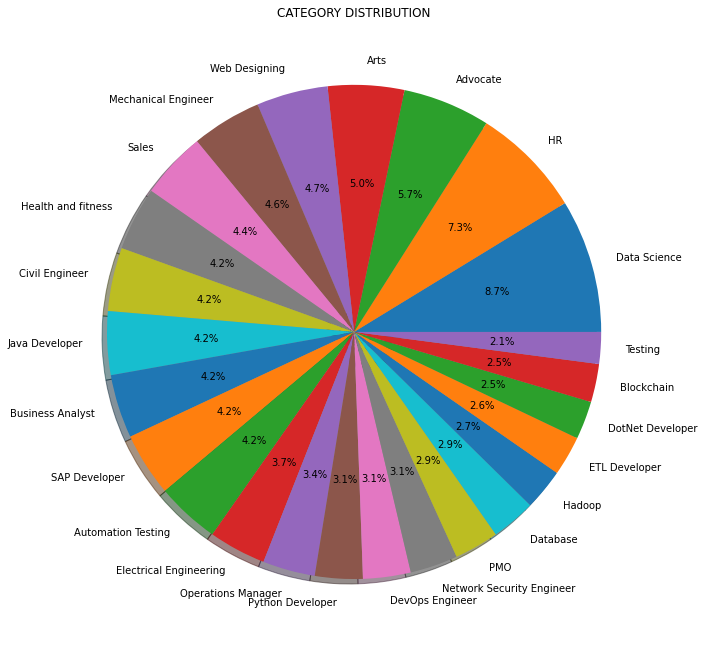

In [14]:
from matplotlib.gridspec import GridSpec
targetCounts = df['Category'].value_counts()
targetLabels  = df['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)
plt.show()

### Data Preprocessing

#### Step 1: Clean the ‘Resume’ column

In [15]:
def cleanResume(resumeText):
    resumeText = re.sub('httpS+s*', ' ', resumeText)       # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)          # remove RT and cc
    resumeText = re.sub('#S+', '', resumeText)             # remove hashtags
    resumeText = re.sub('@S+', '  ', resumeText)           # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^x00-x7f]',r' ', resumeText)    # Replace non asciii characters
    resumeText = re.sub('s+', ' ', resumeText)             # remove extra whitespace
    return resumeText

    
df['cleaned_resume'] = df.Resume.apply(lambda x: cleanResume(x))

In [16]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = df['Resume'].values
cleanedSentences = ""
for i in range(0,160):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('e', 564), ('Detail', 494), ('month', 482), ('Exprience', 446), ('cription', 358), ('de', 354), ('compan', 330), ('1', 290), ('ed', 270), ('ear', 258), ('ing', 238), ('Skill', 236), ('u', 234), ('Januar', 216), ('pon', 214), ('Data', 204), ('data', 204), ('Le', 204), ('project', 200), ('P', 194), ('S', 186), ('Re', 180), ('thon', 172), ('De', 172), ('Compan', 170), ('tic', 168), ('htra', 168), ('Mahara', 166), ('6', 164), ('A', 160), ('h', 158), ('Education', 158), ('Science', 158), ('The', 146), ('I', 146), ('ine', 142), ('College', 140), ('tem', 136), ('Anal', 132), ('anal', 132), ('Project', 132), ('M', 126), ('like', 126), ('ion', 120), ('Learning', 116), ('India', 114), ('Web', 114), ('Machine', 112), ('SQL', 112), ('Univer', 112)]


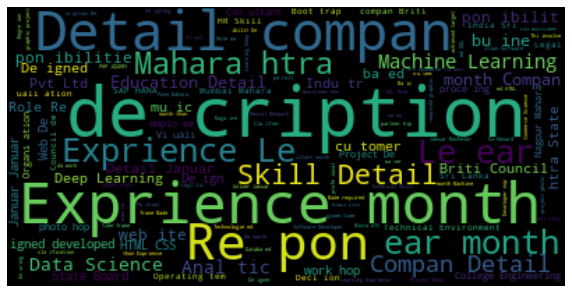

In [18]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
def WordCloudDrow(txx):
  wc = WordCloud().generate(txx)
  plt.figure(figsize=(10,10))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.show()

### Step 2: Encoding ‘Category’

Now, we will encode the ‘Category’ column using LabelEncoding. Even though the ‘Category’ column is ‘Nominal’ data we are using LabelEncong because the ‘Category’ column is our ‘target’ column. By performing LabelEncoding each category will become a class and we will be building a multiclass classification model.

In [20]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [21]:
df.head()

,Category,Resume,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,Skill Programming Language P thon panda ...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Detail Ma 2013 to Ma 2017 B E ...
2,6,"Areas of Interest Deep Learning, Control Syste...",Area of Intere t Deep Learning Control S te...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skill R P thon SAP HANA Table...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Detail MCA YMCAUST Faridabad...


In [22]:
df.Category.value_counts()

15    84
23    70
8     55
20    48
24    45
12    44
13    42
18    40
16    40
10    40
3     40
22    40
6     40
1     36
7     33
19    30
14    30
11    30
4     28
9     28
2     26
17    25
5     24
21    24
0     20
Name: Category, dtype: int64

#### Step 3: Preprocessing ‘cleaned_resume’ column

Here we will preprocess and convert the ‘cleaned_resume’ column into vectors. There are many ways to do that like 
‘**Bag of Words**’, 
‘**Tf-Idf**’, 
‘**Word2Vec**’ 
and a combination of these methods.

We will be using the ***‘Tf-Idf’*** method to get the vectors in this approach.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [24]:
X = df['cleaned_resume'].values
y = df['Category'].values

word_vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english',)
# word_vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english', max_features=1500)  # max_features ordered by term frequency across the corpus.
word_vectorizer.fit(X)
WordFeatures = word_vectorizer.transform(X)
# We have ‘WordFeatures’ as vectors and ‘requiredTarget’ and target 
print ("Feature completed .....")


# We will use 80% data for training and 20% data for validation. Let’s split the data now into training and test set.
X_train,X_test,y_train,y_test = train_test_split(WordFeatures, y, 
                                                 random_state=42, test_size=0.2,
                                                 shuffle=True, stratify = y)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(769, 6410)
(193, 6410)


In [25]:
df.shape

(962, 3)

## Model Building
We will be using the ‘One vs Rest’ method with ‘KNeighborsClassifier’ to build this multiclass classification model


In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix



In [27]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

# Results
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 0.98
Accuracy of KNeighbors Classifier on test set:     0.96


We can see that results are awesome. We are able to classify each Category of a given resume with 98% accuracy.

In [28]:
# detailed classification report for each class or category
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))


 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform'),
                    n_jobs=None):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       1.00      0.60      0.75         5
           3       1.00      1.00      1.00         8
           4       0.86      1.00      0.92         6
           5       1.00      0.60      0.75         5
           6       0.73      1.00      0.84         8
           7       1.00      0.86      0.92         7
         

Where, 0, 1, 3,12,13.... are the job categories. We get the actual labels from the label encoder that we used

In [29]:
le.classes_

array(['Advocate', 'Arts', 'Automation Testing', 'Blockchain',
       'Business Analyst', 'Civil Engineer', 'Data Science', 'Database',
       'DevOps Engineer', 'DotNet Developer', 'ETL Developer',
       'Electrical Engineering', 'HR', 'Hadoop', 'Health and fitness',
       'Java Developer', 'Mechanical Engineer',
       'Network Security Engineer', 'Operations Manager', 'PMO',
       'Python Developer', 'SAP Developer', 'Sales', 'Testing',
       'Web Designing'], dtype=object)

In [ ]:
tx = df['Resume'][707]
tx

"AREA OF EXPERTISE (PROFILE) Around 10 plus years' proven experience with best global brand Wipro with below expertise:- â\x80¢ PMO â\x80¢ ITIL Management â\x80¢ Process Improvements â\x80¢ Project Process Audits â\x80¢ Planning, Scheduling, Effort/Issue/Risk Tracking â\x80¢ Risk & Issue Management â\x80¢ SLA Management â\x80¢ Workforce (staffing) Resource Management. â\x80¢ Transition â\x80¢ Operations management SKILLS Project Management Tools: CA Clarity, Visio and Office, ITIL -Incident management, Recruitment and workforce management Technical: SAP- HR, MRS, CPRO, Confluence, Microsoft Office, Word, PowerPoint.Excellent knowledge & hands on experience in advanced MS Excel (Knowledge on MS Project, Sharepoint Reporting & Ticket Tool: Xtraction, CA Service Desk, I-Tracker, Education Details \r\n MBA HR and Finance Bengaluru, Karnataka RKIMS College\r\nSenior Executive PMO \r\n\r\nSenior Executive PMO Consultant\r\nSkill Details \r\nOPERATIONS- Exprience - 125 months\r\nSTAFFING- Exp

In [ ]:
clean_tx = cleanResume(tx)
clean_tx

'AREA OF EXPE ISE  PROFILE  Around 10 plu   ear   proven experience with be t global brand Wipro with below experti e       PMO     ITIL Management     Proce  Improvement      Project Proce  Audit      Planning  Scheduling  Effort I ue Ri k Tracking     Ri k   I ue Management     SLA Management     Workforce   taffing  Re ource Management      Tran ition     Operation  management SKILLS Project Management Tool   CA Clarit   Vi io and Office  ITIL  Incident management  Recruitment and workforce management Technical  SAP  HR  MRS  CPRO  Confluence  Micro oft Office  Word  PowerPoint Excellent knowledge   hand  on experience in advanced MS Excel  Knowledge on MS Project  Sharepoint Reporting   Ticket Tool  Xtraction  CA Service De k  I Tracker  Education Detail     MBA HR and Finance Bengaluru  Karnataka RKIMS College  Senior Executive PMO     Senior Executive PMO Con ultant  Skill Detail    OPERATIONS  Exprience   125 month   STAFFING  Exprience   125 month   HR  Exprience   79 month   P

In [ ]:
df['cleaned_resume'][707]

'AREA OF EXPE ISE  PROFILE  Around 10 plu   ear   proven experience with be t global brand Wipro with below experti e       PMO     ITIL Management     Proce  Improvement      Project Proce  Audit      Planning  Scheduling  Effort I ue Ri k Tracking     Ri k   I ue Management     SLA Management     Workforce   taffing  Re ource Management      Tran ition     Operation  management SKILLS Project Management Tool   CA Clarit   Vi io and Office  ITIL  Incident management  Recruitment and workforce management Technical  SAP  HR  MRS  CPRO  Confluence  Micro oft Office  Word  PowerPoint Excellent knowledge   hand  on experience in advanced MS Excel  Knowledge on MS Project  Sharepoint Reporting   Ticket Tool  Xtraction  CA Service De k  I Tracker  Education Detail     MBA HR and Finance Bengaluru  Karnataka RKIMS College  Senior Executive PMO     Senior Executive PMO Con ultant  Skill Detail    OPERATIONS  Exprience   125 month   STAFFING  Exprience   125 month   HR  Exprience   79 month   P

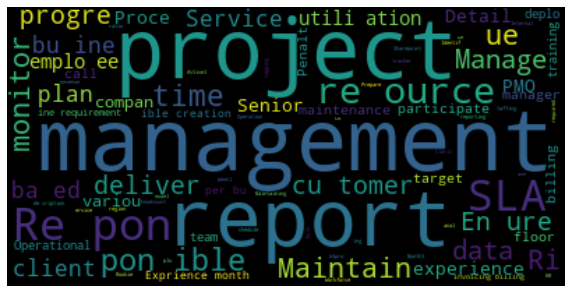

In [ ]:
WordCloudDrow(clean_tx)

In [ ]:
clean_tx

'AREA OF EXPE ISE  PROFILE  Around 10 plu   ear   proven experience with be t global brand Wipro with below experti e       PMO     ITIL Management     Proce  Improvement      Project Proce  Audit      Planning  Scheduling  Effort I ue Ri k Tracking     Ri k   I ue Management     SLA Management     Workforce   taffing  Re ource Management      Tran ition     Operation  management SKILLS Project Management Tool   CA Clarit   Vi io and Office  ITIL  Incident management  Recruitment and workforce management Technical  SAP  HR  MRS  CPRO  Confluence  Micro oft Office  Word  PowerPoint Excellent knowledge   hand  on experience in advanced MS Excel  Knowledge on MS Project  Sharepoint Reporting   Ticket Tool  Xtraction  CA Service De k  I Tracker  Education Detail     MBA HR and Finance Bengaluru  Karnataka RKIMS College  Senior Executive PMO     Senior Executive PMO Con ultant  Skill Detail    OPERATIONS  Exprience   125 month   STAFFING  Exprience   125 month   HR  Exprience   79 month   P

In [ ]:
X[707]

'AREA OF EXPE ISE  PROFILE  Around 10 plu   ear   proven experience with be t global brand Wipro with below experti e       PMO     ITIL Management     Proce  Improvement      Project Proce  Audit      Planning  Scheduling  Effort I ue Ri k Tracking     Ri k   I ue Management     SLA Management     Workforce   taffing  Re ource Management      Tran ition     Operation  management SKILLS Project Management Tool   CA Clarit   Vi io and Office  ITIL  Incident management  Recruitment and workforce management Technical  SAP  HR  MRS  CPRO  Confluence  Micro oft Office  Word  PowerPoint Excellent knowledge   hand  on experience in advanced MS Excel  Knowledge on MS Project  Sharepoint Reporting   Ticket Tool  Xtraction  CA Service De k  I Tracker  Education Detail     MBA HR and Finance Bengaluru  Karnataka RKIMS College  Senior Executive PMO     Senior Executive PMO Con ultant  Skill Detail    OPERATIONS  Exprience   125 month   STAFFING  Exprience   125 month   HR  Exprience   79 month   P

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type([clean_tx])

list

In [ ]:
tx_vector = word_vectorizer.transform([clean_tx])

In [ ]:
clf.predict(tx_vector)

array([19])

In [ ]:
le.classes_[6]

'Data Science'

In [ ]:
df.iloc[707,:]

Category                                                         19
Resume            AREA OF EXPERTISE (PROFILE) Around 10 plus yea...
cleaned_resume    AREA OF EXPE ISE  PROFILE  Around 10 plu   ear...
Name: 707, dtype: object

In [30]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab/NLP/Data/UpdatedResumeDataSet.csv')
df1.head(2)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...


In [31]:
df1[df1['Category']=='Data Science'].iloc[4,:]

Category                                         Data Science
Resume      Education Details \r\n MCA   YMCAUST,  Faridab...
Name: 4, dtype: object

In [32]:
new_resume = df1[df1['Category']=='Data Science'].iloc[4,:]['Resume']

In [33]:
type(new_resume)

str

In [34]:
clean_resume = cleanResume(new_resume)
clean_resume

'Education Detail     MCA   YMCAUST   Faridabad   Har ana  Data Science intern hip       Skill Detail    Data Structure  Exprience   Le  than 1  ear month   C  Exprience   Le  than 1  ear month   Data Anal  i   Exprience   Le  than 1  ear month   P thon  Exprience   Le  than 1  ear month   Core Java  Exprience   Le  than 1  ear month   Databa e Management  Exprience   Le  than 1  ear month Compan  Detail    compan    Itechpower  de cription   '

# predict new Resume

In [35]:
clean_resume = cleanResume(tx)
clean_resume

'Rahul Pu hpalaData Anal  t   Data Scienti t 8108120889  rahulpu hpala rahulpu hpala35 gmail com  T3ch miNer rahul db  500007 H derabad  India TECHNICAL SKILLS Programming Language   P thon 3  SQL  PowerQuer  Technologie   Data Anal  i   Data Vi uali ation  Machine Learning  Natural Language Proce ing  NLP  Tool    Software   Excel  Alter x  Power Bi  Po tgreSQL  Up killing  AWS  P torch and Advance NPL Game Development  Unit    Blender ACADEMIC PROFICIENCYData Science Ma ter  Program   Data Science  Machine LearningGre AtomSep 2019   Ma  2020   Mumbai A  a Data Science Immer ive  tudent at Gre Atom Cla work ranged from in cla  project  and variou  competition  to per onal project  focu ed on real world application  of data  cience principle  and be t practice  P thon librarie   klearn  panda    eaborn matplotlib nltk Bachelor of Engineering   BE  Computer EngineeringPillai College Of Engineering  Mumbai Univer it  2019   Mumbai ORGANISATIONSPetFedVolunteer2018   pre ent Computer Socie

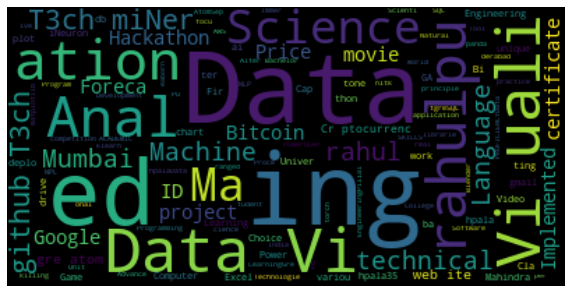

In [36]:
WordCloudDrow(clean_resume)

In [38]:
category_classes = list(le.classes_)
print(len(category_classes))

25


In [41]:
category_classes = ['Advocate',
 'Arts',
 'Automation Testing',
 'Blockchain',
 'Business Analyst',
 'Civil Engineer',
 'Data Science',
 'Database',
 'DevOps Engineer',
 'DotNet Developer',
 'ETL Developer',
 'Electrical Engineering',
 'HR',
 'Hadoop',
 'Health and fitness',
 'Java Developer',
 'Mechanical Engineer',
 'Network Security Engineer',
 'Operations Manager',
 'PMO',
 'Python Developer',
 'SAP Developer',
 'Sales',
 'Testing',
 'Web Designing']

In [62]:
df

,title,paragraphs
0,Rahul_Pushpala,"[Rahul PushpalaData Analyst | Data Scientist, ..."
1,Nikhil_Pawar_Resume,"[NikhilPawarData Science Practitioner, Nikhil ..."
2,DotnetResume,"[Luella Green , 88605 Maximilian Mall San Fr..."
3,nse,"[USER , YOUR NAME E-Mail: youremail@domain.c..."
4,hr,"[Email: youremail@gmail.com , Phone: 895 555 5..."


In [56]:
tx = df['paragraphs'][4]
tx = '\n'.join(tx)
tx

'Email: youremail@gmail.com \nPhone: 895 555 555 \nAddress: 4397 Aaron Smith Drive Harrisburg, PA 17101 \nLinkedin: linkedin.com/in/yourprofile \nSharad S Sawant \nRESUME SAMPLE from Resume Genius \nR E S U M E O B J E CT I V E \nHuman Resources Generalist with 6+ years of experience assisting with and fulfilling organization staffing needs and requirements. Aiming to use my dynamic communication and organization skills to achieve your HR initiatives. Possess a BA in Human Resources Management and a Professional in Human Resources certification.      \nSKILL\nS \nEXPERIENCE \nEDUCATION \nB.A. H.R. MANAGEMENT  \nMiami University, 2012  \nMiami, FL \nA.S. H.R. MANAGEMENT  \nMiami University, 2010  \nMiami, FL  \nCERTIFICATION \nProfessional in Human \nResources \n90WPM Typing Speed Workday MS Office Suite \nLeadership Adaptability. \nKronos \nHR GENERALIST \nMeadow Laboratories, Chicago, IL  /  September 2014 - Present \uf0b7 Implemented effective HR policies to ensure all practices are 

In [57]:
def cleanResume(resumeText):
    resumeText = re.sub('httpS+s*', ' ', resumeText)       # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)          # remove RT and cc
    resumeText = re.sub('#S+', '', resumeText)             # remove hashtags
    resumeText = re.sub('@S+', '  ', resumeText)           # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^x00-x7f]',r' ', resumeText)    # Replace non asciii characters
    resumeText = re.sub('s+', ' ', resumeText)             # remove extra whitespace
    return resumeText



clean_resume = cleanResume(tx)
tx_vector = word_vectorizer.transform([clean_resume])
resume_pred_id = clf.predict(tx_vector)
resume_category = category_classes[resume_pred_id[0]]
print("Category for given resume is ",resume_category)

Category for given resume is  HR


In [58]:
# Dump the file
import pickle
# pickle.dump(word_vectorizer, open("/content/drive/MyDrive/Colab/NLP/PDF/word_vectorizer.pkl", "wb"))


# Testing phase
vectorizer = pickle.load(open("/content/drive/MyDrive/Colab/NLP/PDF/word_vectorizer.pkl", 'rb'))

# pickle.dump(clf, open("/content/drive/MyDrive/Colab/NLP/PDF/OneVsRestClassifier_model.pkl", "wb"))


# Testing phase
model = pickle.load(open("/content/drive/MyDrive/Colab/NLP/PDF/OneVsRestClassifier_model.pkl", 'rb'))

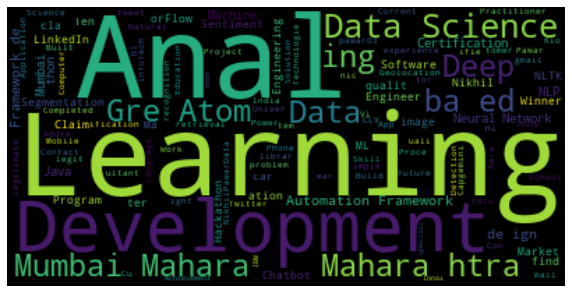

Category for given resume is  Data Science


In [64]:
def cleanResume(resumeText):
    resumeText = re.sub('httpS+s*', ' ', resumeText)       # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)          # remove RT and cc
    resumeText = re.sub('#S+', '', resumeText)             # remove hashtags
    resumeText = re.sub('@S+', '  ', resumeText)           # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^x00-x7f]',r' ', resumeText)    # Replace non asciii characters
    resumeText = re.sub('s+', ' ', resumeText)             # remove extra whitespace
    return resumeText

def WordCloudDrow(txx):
  wc = WordCloud().generate(txx)
  plt.figure(figsize=(10,10))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.show()

tx = df['paragraphs'][1]
tx = '\n'.join(tx)
clean_resume = cleanResume(tx)

WordCloudDrow(clean_resume)

tx_vector = vectorizer.transform([clean_resume])
resume_pred_id = model.predict(tx_vector)
resume_category = category_classes[resume_pred_id[0]]
print("Category for given resume is ",resume_category)